<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana7/CuadraturaGaussiana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym
import math
sym.init_printing(use_unicode=True)

In [101]:
deg = 20
Roots, Weights = np.polynomial.legendre.leggauss(deg)

In [102]:
Roots

array([-0.9931286 , -0.96397193, -0.91223443, -0.83911697, -0.74633191,
       -0.63605368, -0.510867  , -0.37370609, -0.22778585, -0.07652652,
        0.07652652,  0.22778585,  0.37370609,  0.510867  ,  0.63605368,
        0.74633191,  0.83911697,  0.91223443,  0.96397193,  0.9931286 ])

In [103]:
Weights

array([0.01761401, 0.04060143, 0.06267205, 0.08327674, 0.10193012,
       0.11819453, 0.13168864, 0.14209611, 0.14917299, 0.15275339,
       0.15275339, 0.14917299, 0.14209611, 0.13168864, 0.11819453,
       0.10193012, 0.08327674, 0.06267205, 0.04060143, 0.01761401])

In [104]:
f = lambda x: np.sin(x)

In [105]:
# Debemos poner la regla de transformacion a un intervalo general
a = 0
b = np.pi
t = 0.5*(Roots*(b-a)+a+b)
I = 0.5*(b-a)*np.sum(Weights*f(t))
I

np.float64(1.9999999999999982)

In [106]:
integrate.quad(f,0,np.pi)[0]

2.0

In [107]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [108]:
F = x**3*y**2*sym.sin(x)
F

 3  2       
x ⋅y ⋅sin(x)

In [116]:
a = -4.
b = 4.
c = -1
d = 3.66

In [117]:
sym.integrate(F,(x,a,b),(y,c,d))

-188.103553828469

In [118]:
# La doble cuadratura
def f(x,y):
  return x**3*y**2*np.sin(x)

In [119]:
integrate.dblquad(f,c,d,a,b)

(-188.10355382846922, 2.1984304946957167e-08)

In [120]:
def GetIntegral(f,x,w):

  t1 = 0.5*((b-a)*x+a+b)
  t2 = 0.5*((d-c)*x+c+d)

  T1,T2 = np.meshgrid(t1,t2, indexing ='ij')

  #Mapa de cuadratura
  z = np.zeros((deg,deg))

  for i in range(len(t1)):
    for j in range(len(t1)):
      z[i,j] = w[i]*w[j]*f(t1[i],t2[j])

  I = np.sum(z)*(b-a)*(d-c)/4

  return I,z,T1,T2

In [121]:
I, z, T1, T2 = GetIntegral(f,Roots,Weights)
I

np.float64(-188.10355382847422)

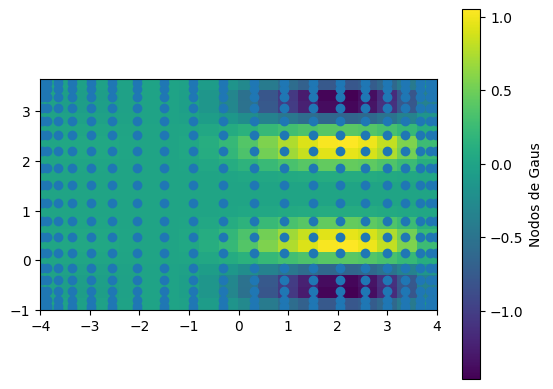

In [122]:
# Mostrando el mapa de cuadratura
plt.imshow(z, origin='lower', extent=[a,b,c,d], interpolation='nearest')
plt.colorbar(label='Nodos de Gaus')
plt.scatter(T1.ravel(),T2.ravel())